<center>
    <h1> ILI-285 - Computación Científica I  </h1>
    <h2> Tarea 3 </h2>
    <h2> 10 de junio de 2016</h2>
</center>

## Tabla de contenidos
* [Introduccion](#intro)
* [Desarrollo y análisis de resultados](#desarrollo)
    - [Factorización SVD](#seccion1)
    - [Compresion de imagenes](#seccion2)
        + [funciones](#funciones)
        + [respuestas](#respuestas)
* [Conclusiones](#conclusion)
* [Referencias](#ref)

<div id='intro' />
<center>
    <h2> Introducción </h2>
</center>

El presente informe tiene por objetivo analizar y estudiar el tipo de descomposicion matricial SVD(Singular Value Descomposition) para la compreson de datos tanto en su forma completa como su forma reducida. Otro objetivo es analizar los cambios que sufren las imágenes luego de pasar por un proceso de compresión. Las imágenes pueden ser vistas como matrices, y cada formato tiene su propia representación de ellos, por ejemplo, puede ser una imagen de 800x600 en RGB, donde cada pixel (cada elemento de la matriz) constará de una combinación de colores en RGB. A esta matriz, se le aplica una descomposición en valores singulares, dándonos así la oportunidad de hacerle una “compresión” a la imagen, dejando cierta cantidad de valores singulares. Es por lo anterior que toca analizar el orden de magnitud de tales valores, el cambio en la calidad de la imagen, y cual es la razón de compresión de la imagen, llevándonos a generar cierto criterio para saber si es conveniente o no comprimirla.

In [12]:
%matplotlib inline
import bitstring as bs
import math as math
import pylab as pl 
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from numpy.lib.stride_tricks import as_strided

<div id='desarrollo' />
<center>
    <h2> Desarrollo y análisis de resultados </h2>
</center>


<div id='seccion1' />

## 1 - Factorización SVD

** a)** Para la factorizacion SVD utilizamos las librerias numpy y pyplot de python, luego con numpy procedemos a hacer la factorizacion SVD de la matriz A. Luego python nos devuelve la Factorización Reducida de la matriz A $\in$ $C^{5x3}$:

In [13]:
###Matriz A:
A = np.array([[1,0,2],[1,1,3],[1,1,-1],[0,2,3],[1,2,1]])

U, S, V = np.linalg.svd(A, full_matrices = False) 
print ("U")
print (U)
print ("S")
print (np.diag(S))
print ("V")
print (V)


U
[[  3.51264150e-01   2.78999087e-01  -6.32455532e-01]
 [  5.89063710e-01   1.68712978e-01  -3.16227766e-01]
 [ -3.05746115e-02  -7.22332735e-01  -3.16227766e-01]
 [  6.30508699e-01   2.18920877e-03   6.32455532e-01]
 [  3.62134528e-01  -6.09857416e-01  -3.99346563e-17]]
S
[[ 5.53972721  0.          0.        ]
 [ 0.          2.30465235  0.        ]
 [ 0.          0.          1.41421356]]
V
[[  2.29593936e-01   4.59187873e-01   8.58156817e-01]
 [ -3.83779395e-01  -7.67558791e-01   5.13387649e-01]
 [ -8.94427191e-01   4.47213595e-01  -4.07678955e-17]]



Donde U $\in$ $C^{5x3}$ es una matriz ortogonal y no unitaria; S $\in$ $C^{3x3}$ una matriz diagonal compuesta por los valores singulares ($\rho_{i}$) de la matriz A, y V $\in$ $C^{3x3}$ es una matriz unitaria y ortogonal. Partimos inicialmente con una circunferencia unitaria con vectores generadores unitarios y ortogonales, al aplicar la matriz V*, hacemos una rotación sin afectar la norma de los vectores, luego aplicamos S, que al ser la matriz diagonal con los valores singulares de A deforma la circunferencia, ahora los vectores generadores valdrán $\rho$  , luego al aplicar U, nuestra elipse quedará rotada con vectores de tamaño $u_{i}$$\rho_{i}$  donde $u_{i}$ son los elementos de la matriz U.

**b)** Factorizacion completa de la matriz A: 


 U es  una matriz ortogonal y no unitaria de dimension $U^{5x5}$, S es una matriz diagonal
compuesta por los valores singulares de la matriz A de dimension $S^{5x3}$ y V es una matriz unitaria y ortogonal
de dimension $V^{3x3}$, la diferencia esta en que en el caso de la descomposicion reducida la matriz U de dimension
$U^{mxn}$ no es unitaria y como $m \neq n$ no logra formar una base para la dimension mxm, pero al agregar los m-n vectores
ortonormales faltantes, se puede convertir U en una matriz unitaria, y debido a lo anterior la matriz S queda de dimension $S^{5x3}$. 

In [14]:
#1.b
U, S, V = np.linalg.svd(A, full_matrices = True)
esp = np.zeros((abs(A.shape[0]-A.shape[1]),min(A.shape[0],A.shape[1]))) 
print ("U")
print (U)
print ("S")
print (np.concatenate((np.diag(S), esp))) 
print ("V")
print (V)

U
[[  3.51264150e-01   2.78999087e-01  -6.32455532e-01   5.96259035e-01
    2.07961942e-01]
 [  5.89063710e-01   1.68712978e-01  -3.16227766e-01  -6.49934512e-01
   -3.19570035e-01]
 [ -3.05746115e-02  -7.22332735e-01  -3.16227766e-01   2.20530696e-01
   -5.73294711e-01]
 [  6.30508699e-01   2.18920877e-03   6.32455532e-01   3.81557127e-01
   -2.38470431e-01]
 [  3.62134528e-01  -6.09857416e-01  -3.99346563e-17  -1.66855219e-01
    6.84902804e-01]]
S
[[ 5.53972721  0.          0.        ]
 [ 0.          2.30465235  0.        ]
 [ 0.          0.          1.41421356]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
V
[[  2.29593936e-01   4.59187873e-01   8.58156817e-01]
 [ -3.83779395e-01  -7.67558791e-01   5.13387649e-01]
 [ -8.94427191e-01   4.47213595e-01  -4.07678955e-17]]


<div id='seccion2' />

## 2 Compresión de imagenes

<div id='funciones' />
Para la sección {II} se utiliaran las siguientes funciones:


In [15]:
#------------------------PALU---------------------------------------------------------------------
#Funcion de permutaciones para filas 
def row_perm(A, i, j):
    tmp = np.copy(A[i])
    A[i] = A[j]
    A[j] = tmp

#Descomposicion PALU, vista en la materia del curso.
def palu_decomp(A, show=False):
    N,_ = A.shape
    P = np.identity(N)
    L = np.zeros((N,N))
    U = np.copy(A)
    if show:
        print('Initial matrices')
        print('P = '); print(np.array_str(P, precision=2, suppress_small=True))
        print('L = '); print(np.array_str(L, precision=2, suppress_small=True))
        print('U = '); print(np.array_str(U, precision=2, suppress_small=True))
        print('----------------------------------------')
    for j in range(N-1):
        p_index = np.argmax(np.abs(U[j:,j]))
        if p_index != 0:
            row_perm(P, j, j+p_index)
            row_perm(U, j, j+p_index)
            row_perm(L, j, j+p_index)
            if show:
                print('A permutation has been made')
                print('P = '); print(np.array_str(P, precision=2, suppress_small=True))
                print('L = '); print(np.array_str(L, precision=2, suppress_small=True))
                print('U = '); print(np.array_str(U, precision=2, suppress_small=True))
                print('----------------------------------------')
        for i in range(j+1,N):
            L[i,j] = U[i,j]/U[j,j]
            U[i] -= L[i,j]*U[j]
            if show:
                print('P = '); print(np.array_str(P, precision=2, suppress_small=True))
                print('L = '); print(np.array_str(L, precision=2, suppress_small=True))
                print('U = '); print(np.array_str(U, precision=2, suppress_small=True))
                print('----------------------------------------')
    np.fill_diagonal(L,1)
    return P,L,U

def solve_palu(A, b, show=False):
    P,L,U = palu_decomp(A, show)
    #A.x = b -> P.A.x = P.b = b'
    b = np.dot(P,b)
    # L.c = b' with c = U.x
    c = solve_triangular(L, b, upper=False)
    x = solve_triangular(U, c)
    return x

def solve_triangular(A, b, upper=True):
    n = b.shape[0]
    x = np.zeros_like(b)
    if upper==True:
        x[-1] = (1./A[-1,-1]) * b[-1]
        for i in range(n-2, -1, -1):
            x[i] = (1./A[i,i]) * (b[i] - np.sum(A[i,i+1:] * x[i+1:]))
    else:
        x[0] = (1./A[0,0]) * b[0]
        for i in range(1,n):
            x[i] = (1./A[i,i]) * (b[i] - np.sum(A[i,:i] * x[:i]))
    return x


Se debe seleccionar con cual de las 3 imagenes dadas se queire trabajar.

In [24]:
perro = np.array(Image.open('1.png'))
image = np.array(Image.open('2.png'))
simpsons = np.array(Image.open('3.png'))

Se obtiene la dimension de la imagen en pixeles:

In [25]:
image = image / 255
row, col, _ = image.shape
print ("pixels : ", row, "*", col)

pixels :  200 * 200


In [26]:
perro = perro / 255
row1, col1, _ = perro.shape
print ("pixels : ", row1, "*", col1)

pixels :  100 * 100


In [27]:
simpsons = simpsons / 255
row2, col2, _ = simpsons.shape
print ("pixels : ", row2, "*", col2)

pixels :  145 * 100


Se grafica la imagen original:

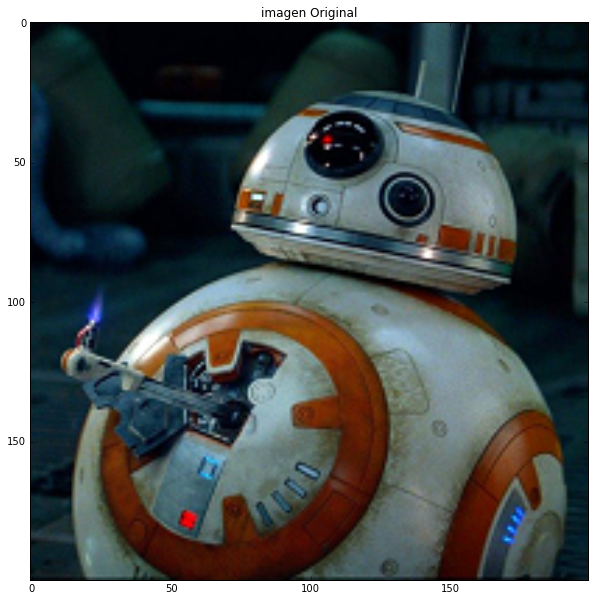

In [28]:
fig = plt.figure(figsize=(15,10))
a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(image)
a.set_title('imagen Original')
plt.show()

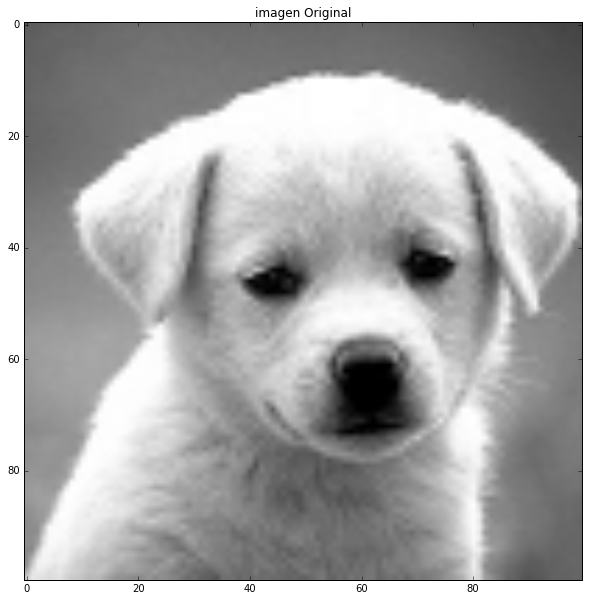

In [10]:
fig = plt.figure(figsize=(15,10))
a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(perro)
a.set_title('imagen Original')
plt.show()

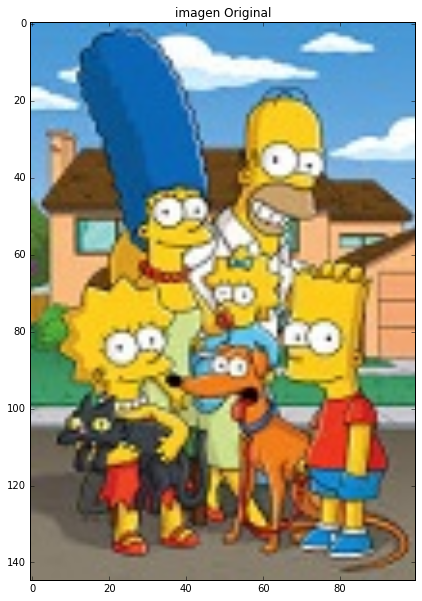

In [11]:
fig = plt.figure(figsize=(15,10))
a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(simpsons)
a.set_title('imagen Original')
plt.show()

Despues creamos la funcion que tomara la matriz original, la cortara en submatrices pequeñas, y a cada submatriz se le hara la descomposicion SVD, para luego tomar los valores singulares mas significativos, y reconstruir la matriz comprimida.

In [34]:
def separar_matrices(tamaño_matriz, L, nVP):
    #separamos la matriz L en submatrices
    #matriz vX = vector X formado por la suma de las columnas de las submatrices
    #submatrix = submatrices cuadradas obtenidas al dividir la matriz original
    submatrix = []
    vX = []
    matrix_vX = []
    coeficientes = []
    c_dim = int(L.shape[0] / tamaño_matriz)
    d_dim = int(L.shape[1] / tamaño_matriz)
    #Vemos el tamaño de la matriz original modulo el tamaño de la submatriz ingresada es es 0, si no es asi no se puede
    #descomponer en submatrices y la funcion arroja un error
    if((L.shape[0] % tamaño_matriz != 0) and(L.shape[1] % tamaño_matriz != 0)):
        print ("No se puede separar la matriz.")
    else:
        #Creamos submatrices dependiendo del tamaño ingresado, metiendolas en la lista submatrix, asi tendremos una
        #lista de submatrices.
        for i in range(0, L.shape[0] ,tamaño_matriz):
            for j in range(0,L.shape[1],tamaño_matriz):
                submatrix.append(L[i:i+tamaño_matriz,j:j+tamaño_matriz])
        #Luego dejamos cada submatriz como un vector, como se menciona en las indicaciones del laboratorio.
        for k in range(0,len(submatrix)):
            for m in range(0, len(submatrix[0][0])):
                for n in range(0,len(submatrix[0][0])): 
                    vX.append(submatrix[k][m][n])
            matrix_vX.append(vX)
            vX = []
        #se llevan a matrices de tipo numpy estas matrices formadas. luego, de traspone la matriz para
        #dejar finalmente la multiplicacion X^T * X.
        arreglo_numpy = np.array(matrix_vX)
        arreglo_numpy_T = np.array(matrix_vX)[np.newaxis]
        matrix_numpy = np.asmatrix(arreglo_numpy)
        matrix_numpy_traspuesta = np.asmatrix(arreglo_numpy_T)
        matrix_mult = np.dot(matrix_numpy_traspuesta.T, matrix_numpy)
        U_r, d_r, V_r = np.linalg.svd(matrix_mult, full_matrices = True)
        V_r = V_r.transpose()
        #Resuelvo el sistema de ecuaciones para hallar los coeficientes.
        for c in arreglo_numpy:
            coeficientes.append(solve_palu(V_r,c))
         
        #aqui se ve que porcentaje se valores singulares se tomaran.
        nuevo_nVP = int(round((tamaño_matriz**2)*(nVP/100)))
        for i in range(nuevo_nVP,V_r.shape[1]):
            for j in range(0,V_r.shape[1]):
                V_r[j,i] = 0
                
        recontruccion = []
        mid_matrix = []
        pre_final = []
        final = []
        
        #finalmente se procede a reconstruir por pasos la matriz, uniendo primero las matrices hacia los lados
        #(de izquiera a derecha), y luego pegando todas esas filas (poniendo una fila debajo de otra)para 
        #formar la matriz.
        for h in coeficientes:
            for i in range(0,tamaño_matriz**2):
                recontruccion.append(np.dot(V_r[i],h)[0,0])
            mid_matrix.append(recontruccion)
            recontruccion = []
            
        for l in mid_matrix:
            recontruccion.append(np.reshape(l,(tamaño_matriz,tamaño_matriz)))
            
        for k in range(0,c_dim):
            pre_final.append(np.concatenate((recontruccion[d_dim*k:(d_dim*k + d_dim)]),axis=1))
            
        for h in pre_final:
            for k in range(0,tamaño_matriz):
                final.append(h[k])
                
        return (final)

In [33]:
#procedemos a reconstruir la imagen en colores
def colores(image,dimension,porcentaje):
    image_red = image[:,:,0]
    image_green = image[:,:,1]
    image_blue = image[:,:,2]
    
    image_red_approx = separar_matrices(dimension,image_red,porcentaje)
    image_green_approx = separar_matrices(dimension,image_green,porcentaje)
    image_blue_approx = separar_matrices(dimension,image_blue,porcentaje)
    image_reconstructed = np.zeros((image.shape[0],image.shape[1],3))

    image_reconstructed[:,:,0] = image_red_approx
    image_reconstructed[:,:,1] = image_green_approx
    image_reconstructed[:,:,2] = image_blue_approx

    image_reconstructed[image_reconstructed < 0] = 0
    image_reconstructed[image_reconstructed > 1] = 1
    
    return image_reconstructed

In [14]:
#Si queremos resonctruir la matriz con las tonalidades grises, usamos esta funcion(para preguntas de comparacion).
def gris(image,dimension,porcentaje):
    
    image_red = image[:,:,0]
    image_green = image[:,:,1]
    image_blue = image[:,:,2]
    
    L = 0.299*image_red + 0.587*image_green + 0.114*image_blue
    
    image_approx = separar_matrices(dimension,L,porcentaje)
    
    return image_approx

In [30]:
#funcion para graficar las imagenes con tonalidad gris
def graficarGris(imagen,x,y):
    fig = plt.figure(figsize=(15,10))
    a = fig.add_subplot(1,1,1)
    imgplot = plt.imshow(gris(imagen,x,y),cmap="gray")
    a.set_title('Imagen reconstruida en gris')
    plt.show()

## Imagenes en Blanco y negro

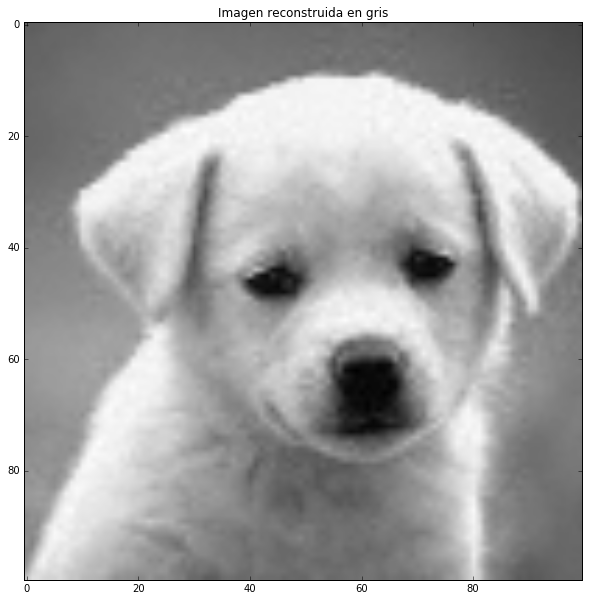

In [16]:
graficarGris(perro,10,30)

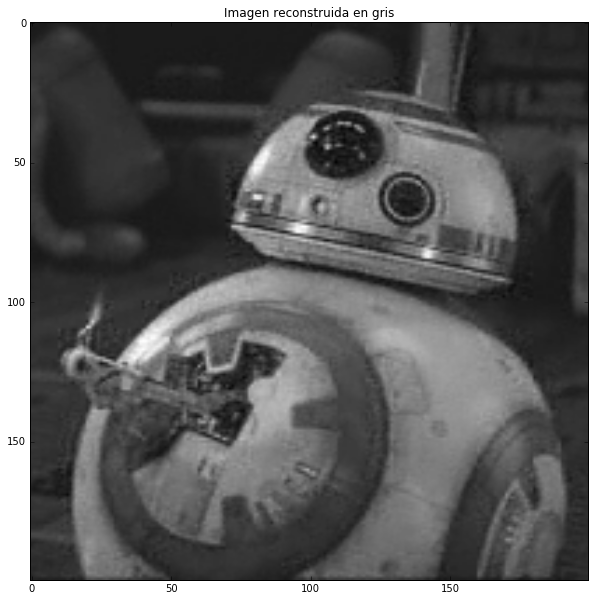

In [17]:
graficarGris(image,10,30)

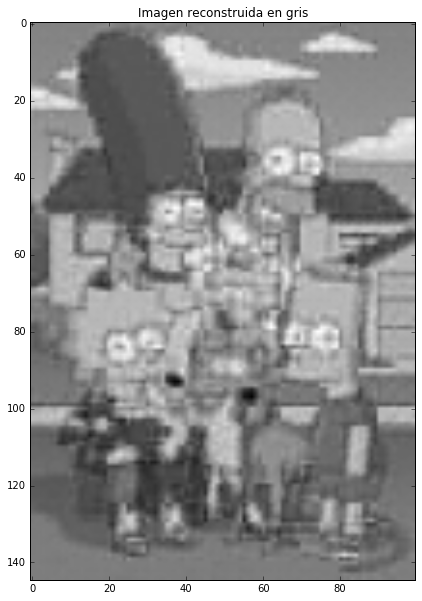

In [18]:
graficarGris(simpsons,5,30)

## Imagenes a color

In [31]:
#funcion para graficar las imagenes en tonalidad a color (con los canales juntos)
def graficarColor(imagen,x,y):    
    fig = plt.figure(figsize=(15,10))
    a = fig.add_subplot(1,1,1)
    imgplot = plt.imshow(colores(imagen,x,y))
    a.set_title('Imagen reconstruida en color')
    plt.show()

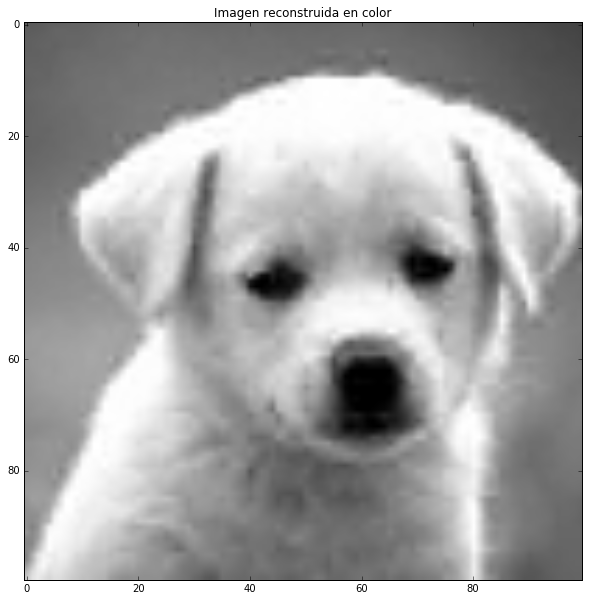

In [20]:
graficarColor(perro,5,30)

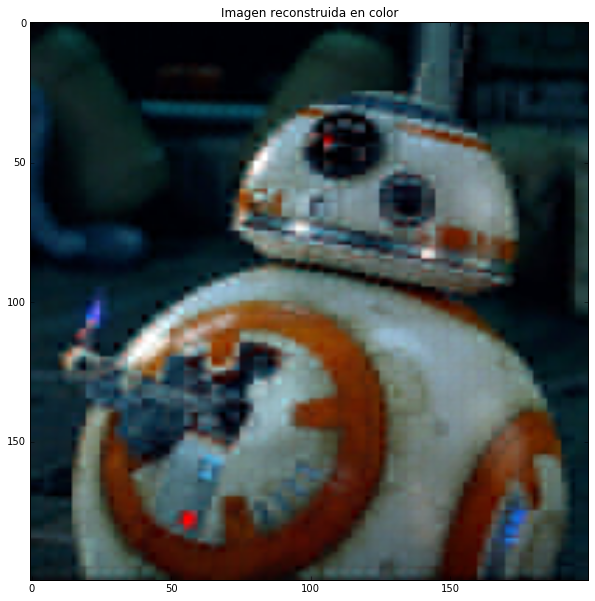

In [21]:
graficarColor(image,5,15)

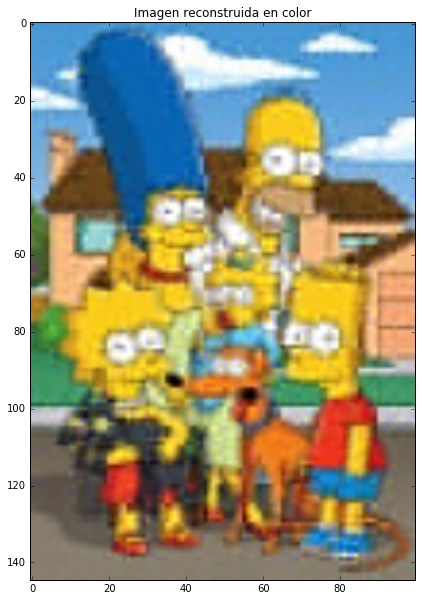

In [22]:
graficarColor(simpsons,5,30)

## Pregunta 2.a

In [23]:
#Pregunta 2.a)
def ejes_a_graficar(image,nomre_grafica):
    #lista con dimensiones de las submatrices
    X = []
    #lista con porcentajes
    Y = [20,40,60,80]
    #lista con calidades
    Z = []
    image_red = image[:,:,0]
    image_green = image[:,:,1]
    image_blue = image[:,:,2]
    
    L = 0.299*image_red + 0.587*image_green + 0.114*image_blue
    
    #Recorremos matrices de 19 x 19, ya que de 20x20 hacia adelante los calculos empiezan a ser muy costosos, lo que
    #hace que demore mucho el programa.
    for i in range(2,20):
        if((image.shape[0] % i == 0) and(image.shape[1] % i== 0)):
            X.append(i)
            #Iteramos por porcentajes de 20 a 80, y de 20 en 20 porciento. (no tomamos el 100% ya que la calidad dara un
            #numero muy alto, lo cual da sentido ya que el denominador de la comparacion se hace muy pequeño, haciendo
            #tender la division a un numero gigante), y calculamos las calidades.
            for k in range(20,100,20):
                imagen_aproximada = gris(image,i,k)
                numerador = L - imagen_aproximada
                Z.append(np.linalg.norm(L, np.inf) / np.linalg.norm(numerador, np.inf))

    #graficamos los 3 ejes             
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    #cambiamos las listas X e Y de forma que nos quede que para submatrices de dimension 2, el eje y varie de 20 a 80%,
    #dejandonos distintos C en cada caso.
    X1 = np.repeat(X,len(Y)).tolist()
    Y1 = Y*len(X)
    ax.scatter(X1, Y1, Z, c='r',marker='o')
    ax.set_title(nomre_grafica)
    ax.set_xlabel("Dimension submatriz")
    ax.set_ylabel("Porcentaje reconstruccion")
    ax.set_zlabel("Calidad")
    plt.show()

## Graficas de Calidad de las 3 imagenes

[ 2  2  2  2  4  4  4  4  5  5  5  5  8  8  8  8 10 10 10 10]
[20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80]
[7.0917927665564147, 9.4825031771427959, 9.4825031771427959, 20.371606962076722, 7.6377439953926443, 11.070169037988245, 17.962522511244281, 27.43680130733005, 8.3570214080230745, 11.579122288333668, 18.301692796812844, 27.719246141743312, 9.5803032690730685, 15.494776156526695, 19.825276579906376, 36.78111927445341, 9.1654150721837553, 15.688420444516774, 27.775852896178804, 47.60936298183799]
20
20
20


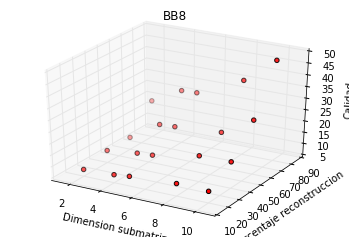

In [24]:
ejes_a_graficar(image,"BB8")

[ 2  2  2  2  4  4  4  4  5  5  5  5 10 10 10 10]
[20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80]
[15.688607672418847, 25.795714229899371, 25.795714229899371, 47.875628513140221, 18.146663651646598, 29.455718524757966, 40.566279982274004, 65.105609221421261, 20.012176611238846, 31.927190993403361, 40.09139938903548, 67.177863550092169, 31.830194104173486, 58.573155394808182, 134.79324431063802, 585.04508079250695]
16
16
16


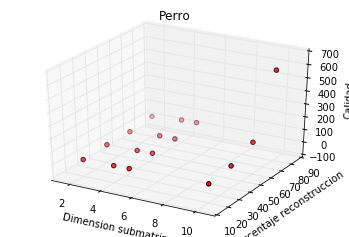

In [25]:
ejes_a_graficar(perro, "Perro")

[5 5 5 5]
[20, 40, 60, 80]
[6.2977376522771529, 8.1926640573611653, 11.159650367746464, 16.299332948017458]
4
4
4


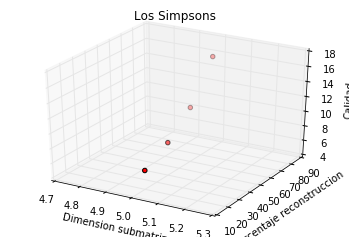

In [26]:
ejes_a_graficar(simpsons,"Los Simpsons")

## Pregunta 2.b

In [27]:
#Pregunta 2.b)
#cantidad de elementos que tiene la matriz aproximada 
def size(tamaño_submatriz,n_col,n_row,porcentaje):
    return(((n_col*n_row)+(tamaño_submatriz**2)**2)*porcentaje)

def razon_a_graficar(image,nombre_grafico):
    #lista con dimensiones 
    X = []
    #lista con porcentajes
    Y = [20,40,60,80]
    #lista con razones
    Z = []
    image_red = image[:,:,0]
    image_green = image[:,:,1]
    image_blue = image[:,:,2]
    
    L = 0.299*image_red + 0.587*image_green + 0.114*image_blue
    
    #Recorremos ver matrices de 19 x 19, ya que de 20x20 hacia adelante los calculos empiezan a ser muy costos, lo que
    #hace que demore mucho el programa.
    for i in range(2,20):
        if((image.shape[0] % i == 0) and(image.shape[1] % i== 0)):
            X.append(i)
            #para distintos porcentajes, calculamos la razon y la guardamos.
            for k in range(20,100,20):
                imagen_aproximada = np.asmatrix(gris(image,i,k))
                tamorig =L.shape[0]*L.shape[1]
                tamcomp = size(i,imagen_aproximada.shape[1],imagen_aproximada.shape[0],k/100)
                divisiontam = abs(tamorig-tamcomp)/tamorig
                Z.append(divisiontam)
    #luego procedemos a graficar los 3 ejes.
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    X1 = np.repeat(X,len(Y)).tolist()
    Y1 = Y*len(X)
    ax.scatter(X1, Y1, Z, c='r',marker='o')
    ax.set_title(nombre_grafico)
    ax.set_xlabel("Dimension submatriz")
    ax.set_ylabel("Porcentaje reconstruccion")
    ax.set_zlabel("Razon")
    plt.show()

## Graficos de razones de las 3 imagenes

[ 2  2  2  2  4  4  4  4  5  5  5  5  8  8  8  8 10 10 10 10]
[20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80]
[0.79992, 0.5998399999999999, 0.39976000000000006, 0.19967999999999994, 0.79872, 0.59744, 0.39616, 0.19487999999999991, 0.796875, 0.59375, 0.390625, 0.1875, 0.77952, 0.55904, 0.33856, 0.11807999999999992, 0.75, 0.5, 0.25, 0.0]
20
20
20


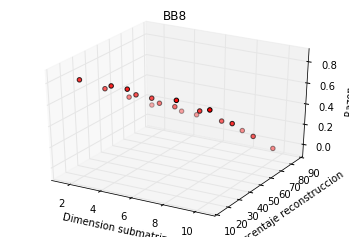

In [28]:
razon_a_graficar(image,"BB8")

[ 2  2  2  2  4  4  4  4  5  5  5  5 10 10 10 10]
[20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80, 20, 40, 60, 80]
[0.7996800000000001, 0.59936, 0.39904000000000006, 0.19871999999999998, 0.7948799999999999, 0.58976, 0.38464000000000004, 0.1795199999999999, 0.7875, 0.575, 0.3625, 0.15, 0.6, 0.2, 0.2, 0.6]
16
16
16


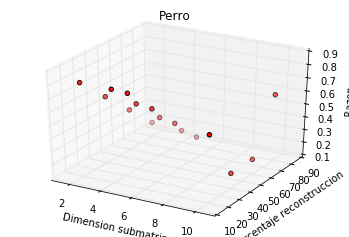

In [29]:
razon_a_graficar(perro,"Perro")

[5 5 5 5]
[20, 40, 60, 80]
[0.7913793103448276, 0.5827586206896552, 0.3741379310344828, 0.16551724137931034]
4
4
4


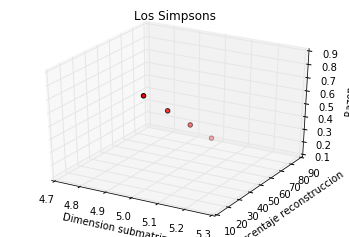

In [30]:
razon_a_graficar(simpsons,"Los Simpsons")

## Pregunta 2.c

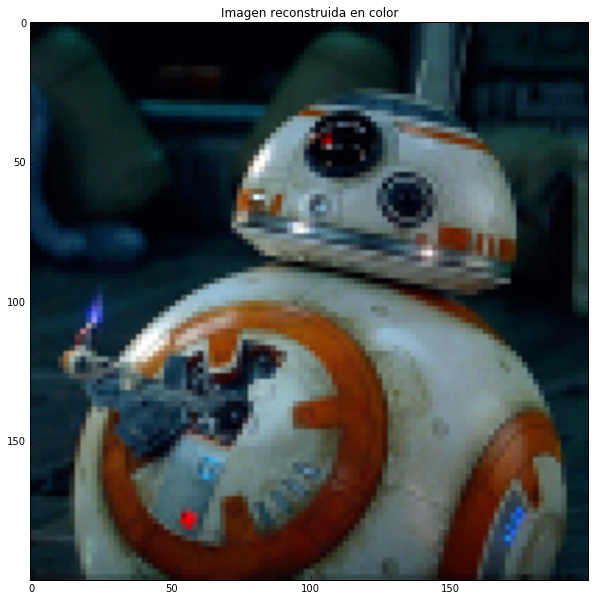

In [25]:
#Pregunta 2.c
#mostramos una imagen reconstruida usando el mismo porcentaje (15%) pero con distintas submatrices.
graficarColor(image,2,15)

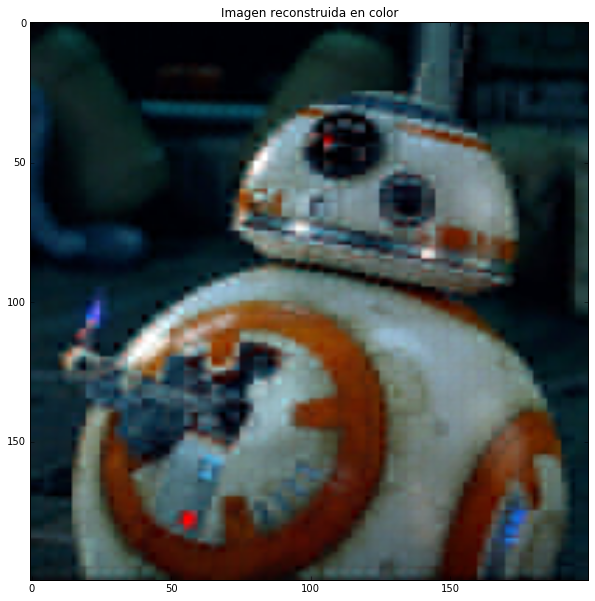

In [26]:
graficarColor(image,5,15)

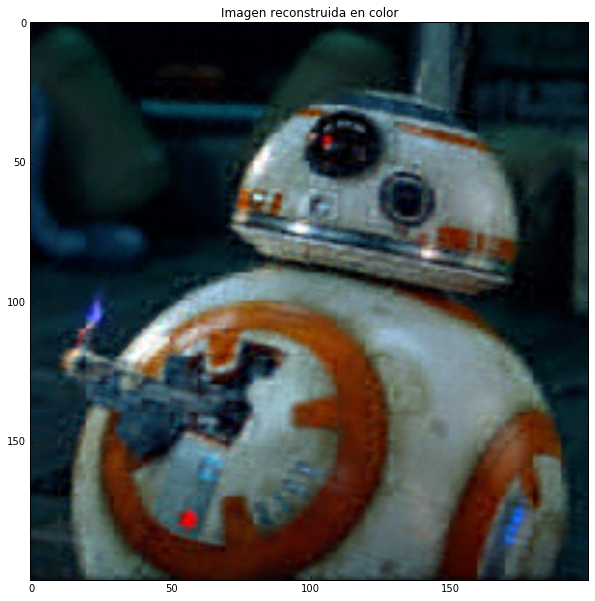

In [27]:
graficarColor(image,10,15)

In [ ]:
graficarColor(image,100,90)

Nos damos cuenta que al ejecutar la ultima funcion,reconstruye muy bien la imagen, pero el tiempo usado para ejecutar esta imagen es muy grande (sobretodo para comparacion entre muchas imagenes, o imagenes con tamaños gigantescos), por lo que nos damos cuenta que entre mas grande las submatrices, mejor queda reconstruido, pero mas tiempo tarda. para efectos de tiempo, compararemos mas adelante razones y calidades de matrices solo de $10x10$, aunque la calidad optima
para que las imagenes se vean bien empiezan de $20x20$ (si se quisiera hacer una mejor evaluacion, basta con cambiar el tamaño de la submatriz de 10 a 20 en las funciones posteriores).

## Pregunta 2.d

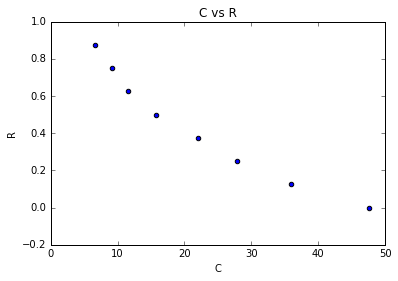

In [35]:
#Pregunta 2.d)
def RvsC(image):
    Y = []
    X = []
    image_red = image[:,:,0]
    image_green = image[:,:,1]
    image_blue = image[:,:,2]
    
    L = 0.299*image_red + 0.587*image_green + 0.114*image_blue
    for k in range(10,90,10):
                #calculo de C
                imagen_aproximada = gris(image,10,k)
                numerador = L - imagen_aproximada
                X.append(np.linalg.norm(L, np.inf) / np.linalg.norm(numerador, np.inf))
                #calculo de R
                imagen_aproximada_2 = np.asmatrix(imagen_aproximada)
                tamorig =L.shape[0]*L.shape[1]
                tamcomp = size(10,imagen_aproximada_2.shape[1],imagen_aproximada_2.shape[0],k/100)
                divisiontam = abs(tamorig-tamcomp)/tamorig
                Y.append(divisiontam)
    #graficamos ambas listas para ver la comparacion.
    fig, ax = plt.subplots()
    ax.set_title("C vs R")
    ax.set_xlabel("C")
    ax.set_ylabel("R")
    ax.scatter(X, Y)
    
    plt.show()
RvsC(image)

<div id='respuestas' />
##  Respuestas sección {II}

Para esta seccion se guardaron los graficos pedidos en las preguntas a,b,c,d en la carpeta del archivo comprimido, ya que el calculo de estos es muy costoso y toma mucho tiempo, asi se puede hacer una observacion rapida de ellos, aun asi se puede corroborar que estos son correctos ejecutando el codigo para las distintas imagenes.

**(a)** Para obtener el grafico de cada una de las imagenes se utiliza la funcion **ejes_a_graficar(image)** donde "image" es la imagen con la que se esta trabajando que esta definida anteriormente como **image = np.array(Image.open(imagen_abir))** donde "imagen_abrir" puede ser "1.png", "2.png" o "3.png",luego en los graficos obtenidos se logra obervar que a medida que aumentamos el tamaño de las submatrices la calidad aumenta y tambien lo hace con mayor cantidad de vectores propios, pero si juntamos estos 2, es aun mejor ya que si por ejemplo tomamos el caso de una submatriz pequeña, al aumentar la cantidad de vectores propios la calidad no aumenta mucho, no asi con el caso contrario en donde tomamos una submatriz de gran tamaño y muchos vectores propios, aqui la calidad aumenta de forma notoria.

**(b)** Para poder obtener los graficos se utilizo la funcion **razon_a_graficar(image)** donde "image" corresponde a lo mismo que en la pregunta **(a)**. Al observar los 3 graficos se noto inmediatamente que para R se produce el efecto contrario a la pregunta anterior, ya que este disminuye a mayor tamaño de submatrices y mayor cantidad de vectores propios, y disminuye de forma más abrupta cuando se aumenta la cantidad de vectores propios para submatrices de mayor tamaño.

**(c)** 
- La combinacion optima entre submatrices y vectores propios viene siendo submatrices que se encuentren en el medio de la lista de submatrices posibles para utilizar y hasta de un tamaño un poco más grande, nunca los extremos, mientras que para los vectores propios, alrededor de la mitad de estos seria lo correcto ya que al disminuirlos la calidad aumenta muy pobremente mientras que si se aumentan la razon de compresencion se dispara de forma decreciente.
- A medida que se utlizan más vectores propios si se quiere priorizar la calidad se utilizan submatrices de mayor tamaño y de forma analoga si se quiere priorizar R, en el caso optimo como se dijo anteriormente submatrices de tamaño medio o un poco mayor.
- Submatrices grandes ya que si se utilizan pocos vectores propios en comparacion a las pequeñas se tendra mejor calidad, mientras que para las pequeñas al variar los vectores propios la calidad aumenta muy pobremente.
- Se adjuntan las imagenes comprimidas en carpeta "Imagenes comprimidas", ademas en el notebook se adjuntan compresiones de una imagen con distintas submatrices, a un mismo porcentaje.

**(d)** Mediante la funcion **RvsC(image)** se obtiene el grafico pedido, utilizando submatrices de $10x10$, lo que se observa es lo esperado, ya que a medida que aumenta C, R tiende a disminuir que es lo mismo que se habia observado en los graficos anteriores.(el grafico tambien se adjunta en la carpeta)

**(e)** El metodo propuesto que pensamos para poder implementar un nuevo formato para almacenar la imagen es usar todos los datos de pixeles para poder formar una funcion f(fila, columna), que reciba como parametro la coordenada (fila, columna) y nos arroja un valor z que sera el pixel usado para poder rearmar una nueva matriz. Esta funcion saldra del resultado de una interpolacion (o regresion) usando todos los datos de la matriz. Si quisieramos que fuera mas eficiente, tendriamos que hacer una regresion a las columnas o filas de la matriz original, y si estas correlaciones son estables (mayores que 0.5) quiere decir que podemos omitir ciertos datos de las columnas o filas para el calculo de la funcion, haciendo que el peso total de la matriz reconstruida sea menor. El software deberia ser capaz de tomar la data y poder armar funcion interpolada, para luego tomar los datos e irlos interpolando hasta llegar a la nueva matriz.

<div id='conclusion' />
<center>
    <h2> Conclusiones </h2>
</center>
El presente informe nos ha mostrado que la compresión de imágenes es bastante factible, ya que a travez de las descomposicion en submatrices, y realizando la descomposicion SVD de cada una de las submatrices, a un cierto porcentaje, hemos observado que la calidad es bastante buena a medida que usamos una dimension grande para las submatrices. Por otra parte, tampoco podemos usar un numero muy grande para las submatrices, ya que el costo en memoria y tiempo de ejecucion es muy grande, por lo que debemos encontrar un equilibrio. Concluimos gracias a la pregunta 2.d que en intervalos de submatrices de 2x2 a 10x10, y con cierto porcentaje, se mantiene estable la calidad, y no consume tanta memoria y tiempo de ejecucion al momento de ejecutar el programa. 


<div id='ref' />
<center>
    <h2> Referencias</h2>
</center>
- http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html - SVD implementada por librería Numpy.
- http://effbot.org/imagingbook/image.htm - Cómo usar el módulo PIL
- http://www.fing.edu.uy/inco/cursos/numerico/aln/SVD_2013.pdf\end{verbatim - Más detalles sobre la SVD y significado de las matrices.
